Chapter 07

# 可视化线性方程组
《线性代数》 | 鸢尾花书：数学不难

该代码的目的是**可视化**一个 **二维线性方程组** 的解集，即两条直线在平面上的交点。我们从数学角度分析代码的计算过程，并解释其核心思想。

---

## **数学建模**
代码涉及一个线性方程组的几何表示。一般而言，**线性方程组**可以表示为：
$$
A \mathbf{x} = \mathbf{b}
$$
其中：
$$
A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}, \quad
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
$$

展开后，即：
$$
\begin{cases}
a_{11} x_1 + a_{12} x_2 = b_1 \\
a_{21} x_1 + a_{22} x_2 = b_2
\end{cases}
$$

这表示两条直线在二维平面上的方程。代码的作用是 **绘制这两条直线**，并观察它们的交点。

---

## **代码解析**
### **1. 定义绘图范围**
代码使用 `np.linspace(-4, 4, 400)` 定义变量 $x_1$ 和 $x_2$ 的取值范围，即在 $[-4,4]$ 之间均匀取 400 个点。然后，`np.meshgrid(x1, x2)` 生成一个 **网格点矩阵** $(xx_1, xx_2)$，用于计算方程的值。

### **2. 计算两个方程的值**
代码使用：
$$
zz_1 = a_{11} x_1 + a_{12} x_2 - b_1
$$
$$
zz_2 = a_{21} x_1 + a_{22} x_2 - b_2
$$

来计算两个方程的等高值。等高值为 $0$ 的地方，即：
$$
a_{11} x_1 + a_{12} x_2 = b_1
$$
$$
a_{21} x_1 + a_{22} x_2 = b_2
$$
就是直线的方程。

### **3. 绘制等高线**
代码使用 `plt.contour()` 绘制等高线：
- **第一条直线（红色）：** $a_{11} x_1 + a_{12} x_2 = b_1$
- **第二条直线（蓝色）：** $a_{21} x_1 + a_{22} x_2 = b_2$

等高线 `levels=[0]` 表示绘制**值为 0 的等高线**，即原方程的解。

---

## **几何解释**
### **交点的计算**
若两条直线相交，即方程组有唯一解，则交点 $(x_1, x_2)$ 为：
$$
\mathbf{x} = A^{-1} \mathbf{b}
$$
其中：
$$
A^{-1} = \frac{1}{\det(A)} \begin{bmatrix} a_{22} & -a_{12} \\ -a_{21} & a_{11} \end{bmatrix}
$$
$$
\det(A) = a_{11} a_{22} - a_{12} a_{21}
$$

如果 $\det(A) \neq 0$，则交点唯一。如果 $\det(A) = 0$，则可能**无解或无穷多解**。

---

## **示例：具体数值计算**
在代码中，我们设定：
$$
A = \begin{bmatrix} 1 & -1 \\ 3 & 3 \end{bmatrix}, \quad
b = \begin{bmatrix} 2 \\ 0 \end{bmatrix}
$$

对应方程：
$$
\begin{cases}
x_1 - x_2 = 2 \\
3x_1 + 3x_2 = 0
\end{cases}
$$

计算行列式：
$$
\det(A) = (1)(3) - (-1)(3) = 3 + 3 = 6 \neq 0
$$

因此，该方程组有**唯一解**。使用矩阵求解：
$$
A^{-1} = \frac{1}{6} \begin{bmatrix} 3 & 1 \\ -3 & 1 \end{bmatrix}
$$

$$
\mathbf{x} = A^{-1} \mathbf{b} = \frac{1}{6} \begin{bmatrix} 3 & 1 \\ -3 & 1 \end{bmatrix} \begin{bmatrix} 2 \\ 0 \end{bmatrix}
$$

计算：
$$
x_1 = \frac{3 \times 2 + 1 \times 0}{6} = \frac{6}{6} = 1
$$
$$
x_2 = \frac{-3 \times 2 + 1 \times 0}{6} = \frac{-6}{6} = -1
$$

即交点为：
$$
(x_1, x_2) = (1, -1)
$$

---

## **可视化分析**
1. **代码绘制了两条直线的等高线（红色和蓝色）。**
2. **直线的交点即为方程组的解**，在图上可以清晰地看到。
3. 如果两条直线**平行（无交点）或重合（无穷多交点）**，代码仍能正确绘制相应情况。

---

## **总结**
该代码的核心目标是 **可视化一个线性方程组的几何解**，通过绘制方程的 **等高线** 来显示解集的结构：
- **唯一解**：两条直线相交，交点即为解。
- **无解**：两条直线平行，没有交点。
- **无穷多解**：两条直线重合，存在无穷多个解。

本质上，该代码利用 **数值网格计算和等高线绘制** 方法，把抽象的代数问题转化为 **直观的几何图像**，帮助理解线性方程组的解。

## 初始化

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 自定义函数求交点

In [18]:
def intersect(a_11, a_12, b_1, a_21, a_22, b_2):
    # 系数矩阵
    A = np.array([[a_11, a_12], 
                  [a_21, a_22]])  
    
    # 常数列向量
    b = np.array([b_1, b_2])  
    
    # 判断方程组是否有唯一解
    if np.linalg.det(A) != 0:
        x_intersection = np.linalg.solve(A, b)  # 计算交点
        x1_intersect, x2_intersect = x_intersection[0], x_intersection[1]
    else:
        x1_intersect, x2_intersect = None, None  # 线性无关情况

    return x1_intersect, x2_intersect

## 自定义可视化函数

In [22]:
def visualize(a_11, a_12, b_1, a_21, a_22, b_2):
    # 定义绘图范围
    x1 = np.linspace(-4, 4, 400)  # x1 取值范围
    x2 = np.linspace(-4, 4, 400)  # x2 取值范围
    xx1, xx2 = np.meshgrid(x1, x2)  # 生成网格点
    
    # 计算两个方程的值
    zz1 = a_11 * xx1 + a_12 * xx2 - b_1  # 第一条直线等高线值
    zz2 = a_21 * xx1 + a_22 * xx2 - b_2  # 第二条直线等高线值
    
    # 绘制等高线
    plt.figure(figsize=(5, 5))
    
    # 红色等高线
    plt.contour(xx1, xx2, zz1, levels=[0], colors='red', 
                linewidths=2, linestyles='solid')  

    # 蓝色等高线
    plt.contour(xx1, xx2, zz2, levels=[0], colors='blue', 
                linewidths=2, linestyles='solid')  

    # 计算交点
    x1_intersect, x2_intersect = intersect(a_11, a_12, b_1, a_21, a_22, b_2)
    
    # 绘制交点
    if x1_intersect is not None and x2_intersect is not None:
        plt.scatter(x1_intersect, x2_intersect, color='black', 
                    marker='o', s=100, label='Intersection')  # 绘制交点
    
    # 图像装饰
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.grid(True, linestyle='--', color = '0.8')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')

## 定义参数

In [24]:
a_11, a_12, b_1 = 1, -1, 2  # 第一条直线的参数
a_21, a_22, b_2 = 3, 3, 0   # 第二条直线的参数

## 可视化

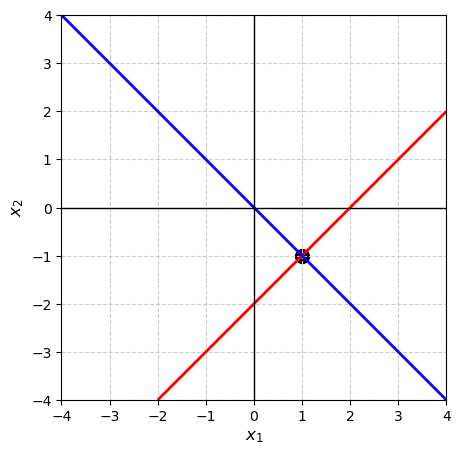

In [26]:
visualize(a_11, a_12, b_1, a_21, a_22, b_2)

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  